In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [5]:
df_arima = pd.read_csv('../output/prediccion_arima.csv')
df_prophet = pd.read_csv('../output/prediccion_prophet.csv')

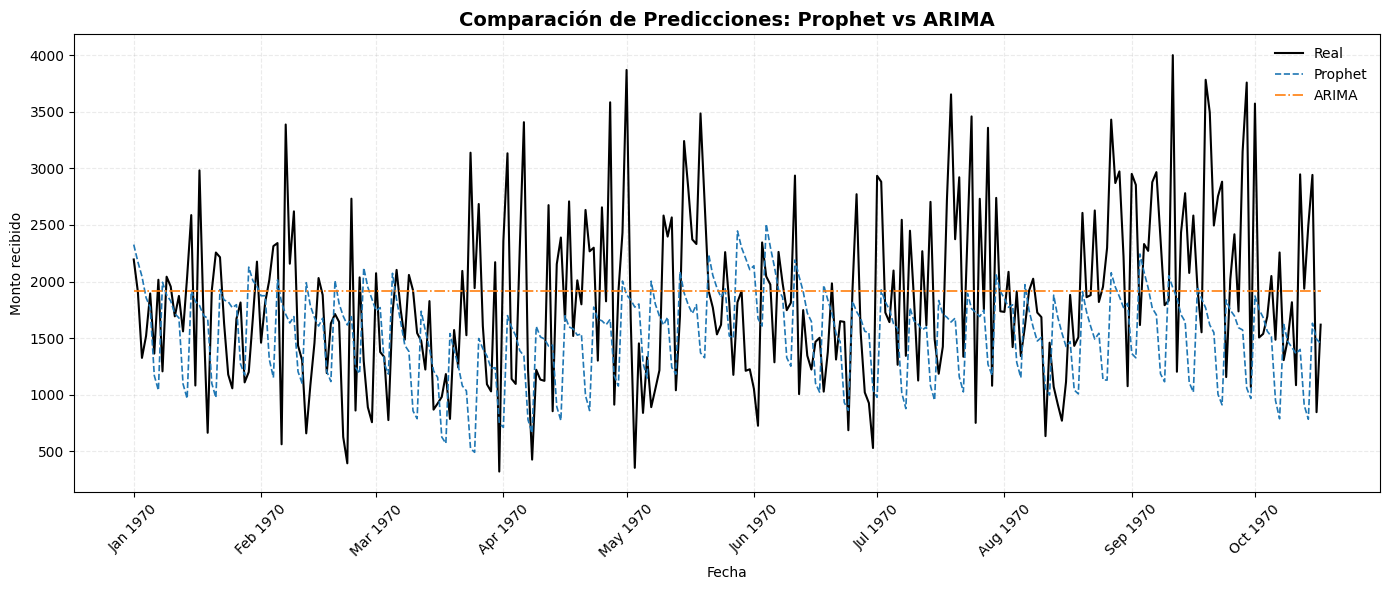

In [6]:
# Asegurarnos que las fechas coincidan en ambos datasets (intersección)
fechas_comunes = df_prophet['ds'].isin(df_arima['fecha'])
df_prophet = df_prophet[fechas_comunes].reset_index(drop=True)
df_arima = df_arima[df_arima['fecha'].isin(df_prophet['ds'])].reset_index(drop=True)

plt.figure(figsize=(14,6))
plt.plot(df_prophet['ds'], df_prophet['real'], label='Real', color='black', linewidth=1.5)
plt.plot(df_prophet['ds'], df_prophet['yhat'], label='Prophet', linestyle='--', color='#1f77b4', linewidth=1.2)
plt.plot(df_arima['fecha'], df_arima['prediccion'], label='ARIMA', linestyle='-.', color='#ff7f0e', linewidth=1.2)

# Formatear fechas
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.title('Comparación de Predicciones: Prophet vs ARIMA', fontsize=14, weight='bold')
plt.xlabel('Fecha')
plt.ylabel('Monto recibido')
plt.legend(frameon=False)
plt.grid(True, linestyle='--', alpha=0.25)
plt.tight_layout()
plt.show()